In [194]:
from collections import Counter
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [195]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])
iris_data = datasets.load_iris()

In [196]:
X,y = iris_data.data,iris_data.target

In [197]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

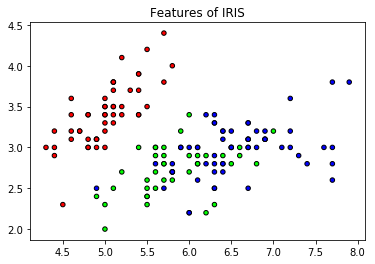

In [198]:
plt.figure()
plt.title("Features of IRIS")
plt.scatter(X[:,0],X[:,1],c=y,cmap= cmap, edgecolor='k',s=20)
plt.show()

In [199]:
class KNN:
    def __init__(self,k):
        self.k = k
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
    def predict(self,X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    def _predict(self,x):
        #compute distances
        distances = [np.linalg.norm(x-x_train) for x_train in self.X_train]
        #shortest distances neighbours
        least_distances = np.argsort(distances)[:self.k]
        near_neigbours = [self.y_train[i] for i in least_distances]
        #majority class
        most_common_class = Counter(near_neigbours).most_common(1)
        return most_common_class[0][0]
        

In [200]:
clf = KNN(3)

In [201]:
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
acc = np.sum(predictions == y_test)/len(y_test)
print(acc)

1.0
